In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, f1_score


In [19]:
df_for_logReg_model = pd.read_csv(os.getcwd()+ os.sep+"df_for_logReg_model.csv") #importing df
df_for_logReg_model

,GP,PPG,FGM,FGA,FG%,3PM,3P%,ORB,DRB,APG,SPG,TOV,is_Champion,league_num
0,4,89.3,30.5,61.5,0.496,9.3,0.389,13.0,24.3,20.8,9.5,19.3,0.0,0
1,6,85.5,30.5,66.7,0.458,5.8,0.307,13.3,29.5,16.3,9.0,15.8,0.0,0
2,4,84.8,33.3,66.0,0.504,7.3,0.387,10.5,20.0,22.8,11.8,18.0,0.0,0
3,6,83.2,32.3,73.2,0.442,4.7,0.243,16.2,26.0,17.2,11.2,14.7,0.0,0
4,6,79.3,29.8,65.2,0.458,6.0,0.303,12.7,24.0,20.2,10.3,19.2,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11552,47,74.9,27.0,66.3,0.406,6.1,0.298,11.8,24.1,14.0,8.6,15.2,0.0,83
11553,47,74.8,26.5,63.0,0.421,7.6,0.312,8.3,21.7,17.5,7.1,15.0,0.0,83
11554,44,72.7,25.9,64.3,0.402,6.2,0.268,10.4,22.7,13.8,8.4,16.2,0.0,83
11555,44,72.7,26.1,64.5,0.405,7.0,0.280,6.7,19.6,14.9,8.4,15.0,0.0,83


In [20]:
X_train, X_test, y_train, y_test = train_test_split(df_for_logReg_model.drop('is_Champion', axis=1), df_for_logReg_model.is_Champion, random_state=0)

In [21]:
X_train.describe()

,GP,PPG,FGM,FGA,FG%,3PM,3P%,ORB,DRB,APG,SPG,TOV,league_num
count,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000
mean,33.709242,81.816892,29.796712,65.736841,0.453115,7.616972,0.337525,9.647917,24.322453,16.682808,7.422753,14.018495,41.645667
std,20.221304,10.458149,4.345103,8.221231,0.030306,2.013701,0.038726,2.111900,3.479982,3.755340,1.578859,2.129367,22.574228
min,1.000000,35.000000,13.500000,47.000000,0.245000,0.100000,0.056000,0.000000,9.000000,4.000000,1.000000,1.000000,0.000000
25%,22.000000,75.400000,27.100000,60.600000,0.436000,6.600000,0.317000,8.400000,22.100000,14.000000,6.400000,12.700000,23.000000
50%,32.000000,79.600000,28.800000,63.300000,0.454000,7.700000,0.340000,9.400000,23.700000,16.300000,7.300000,13.800000,41.000000
75%,39.500000,85.000000,31.000000,67.500000,0.472000,8.800000,0.360000,10.700000,25.800000,18.900000,8.200000,15.100000,56.000000
max,82.000000,126.500000,48.500000,108.100000,0.650000,16.700000,0.609000,21.500000,40.400000,30.400000,18.000000,39.500000,83.000000


In [22]:
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)
acc = clf.score(X_test, y_test)
acc

0.9370242214532872

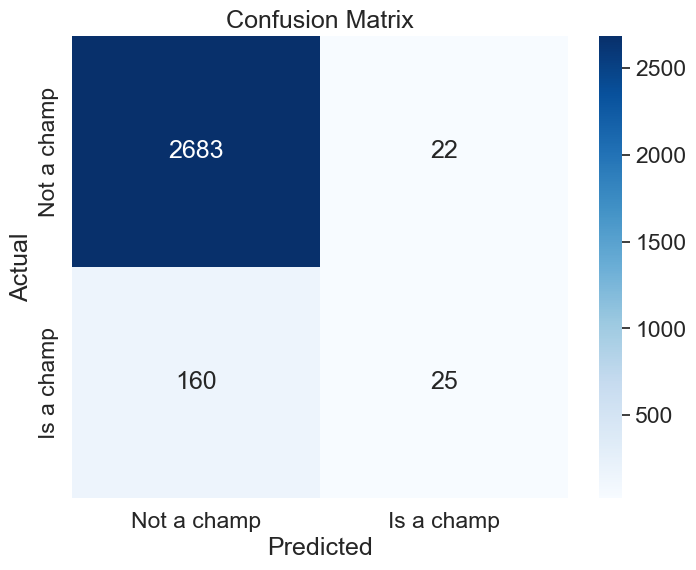

In [23]:
y_pred = clf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels, title, and ticks
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Customize tick labels (if needed)
class_labels = ['Not a champ', 'Is a champ']  # Replace with your actual class labels
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Display the plot
plt.show()


In [24]:
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test,y_pred)

print(f"accuracy is {acc}")
print(f"precision is {precision}")
print(f"recall is {recall}")
print(f"f1 is {f1}")



accuracy is 0.9370242214532872
precision is 0.5319148936170213
recall is 0.13513513513513514
f1 is 0.2155172413793104


In [25]:
'''The evaluation of the model is not so good, the accuracy seems too high, while the f1 is not high enough. We will try to improve our model.'''

'The evaluation of the model is not so good, the accuracy seems too high, while the f1 is not high enough. We will try to improve our model.'

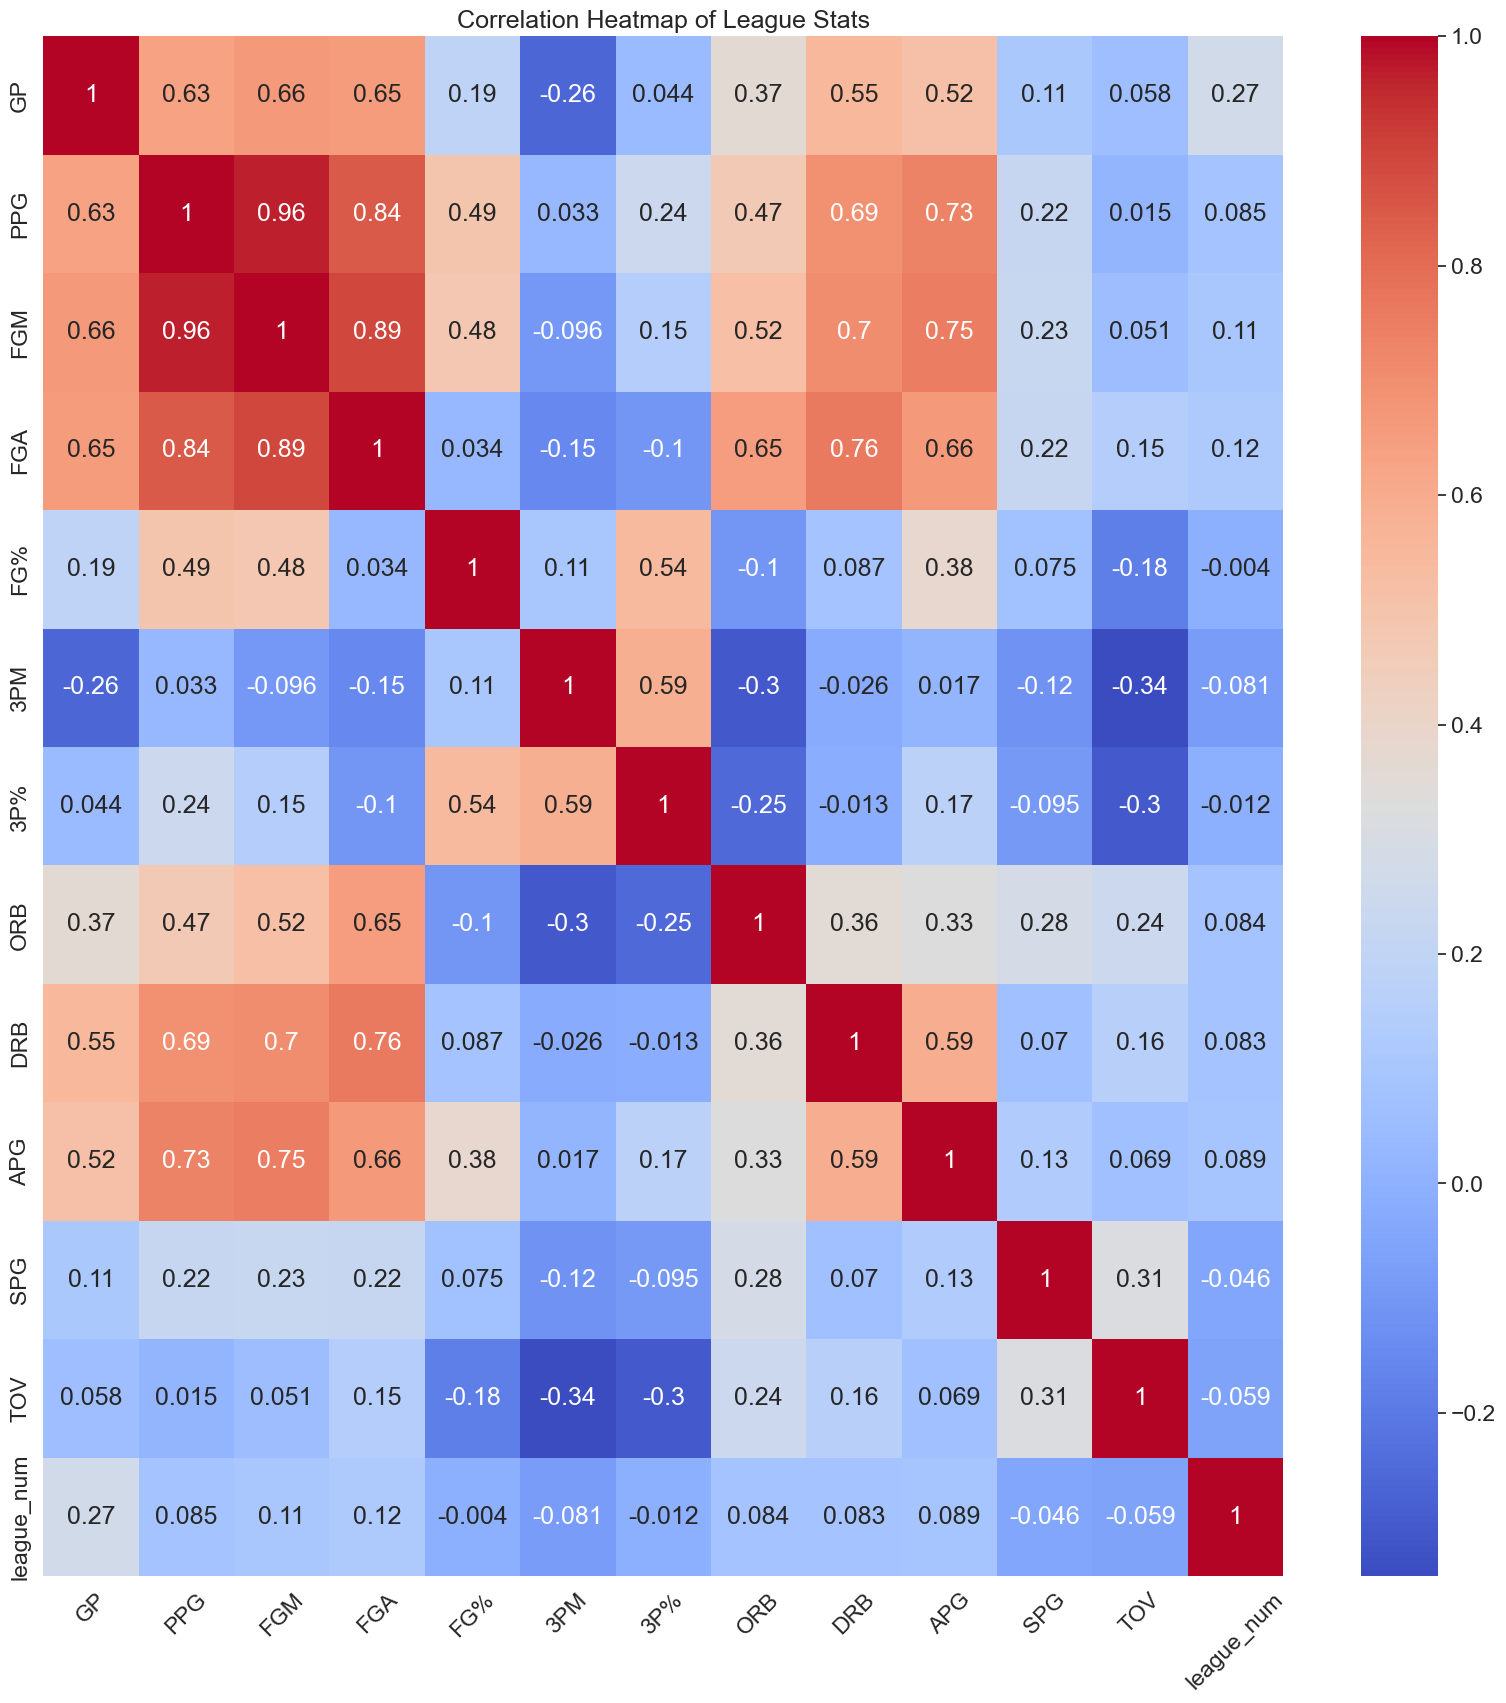

In [26]:
# Set the figure size and font size for the heatmap
plt.figure(figsize=(20, 20))  
sns.set(font_scale=1.5)  

corr_matrix = df_for_logReg_model.drop(["is_Champion"], axis=1).corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap of League Stats')

plt.xticks(rotation=45)

plt.show()

In [27]:
#multiplying high correlated fields to improve model
for i in corr_matrix.index:
    for j in corr_matrix.columns:
        if i != j and corr_matrix.loc[i, j] >= 0.7:
            df_for_logReg_model[f"{i}*{j}"] = df_for_logReg_model[i]*df_for_logReg_model[j]
            print(f"{i} and {j}")    

PPG and FGM
PPG and FGA
PPG and APG
FGM and PPG
FGM and FGA
FGM and DRB
FGM and APG
FGA and PPG
FGA and FGM
FGA and DRB
DRB and FGM
DRB and FGA
APG and PPG
APG and FGM


In [28]:
df_for_logReg_model.describe()

,GP,PPG,FGM,FGA,FG%,3PM,3P%,ORB,DRB,APG,...,FGM*FGA,FGM*DRB,FGM*APG,FGA*PPG,FGA*FGM,FGA*DRB,DRB*FGM,DRB*FGA,APG*PPG,APG*FGM
count,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,...,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000
mean,33.863719,81.844717,29.809544,65.735667,0.453336,7.624332,0.337708,9.649944,24.311335,16.672943,...,1991.042131,735.224846,509.219644,5451.888860,1991.042131,1619.722277,735.224846,1619.722277,1393.189438,509.219644
std,20.204459,10.370892,4.315671,8.194992,0.030015,2.007743,0.038490,2.092284,3.472485,3.756519,...,565.846305,207.426807,188.419197,1420.896941,565.846305,432.551341,207.426807,432.551341,484.015794,188.419197
min,1.000000,35.000000,13.500000,47.000000,0.245000,0.100000,0.056000,0.000000,9.000000,4.000000,...,742.500000,198.000000,84.000000,1925.000000,742.500000,432.000000,198.000000,432.000000,284.000000,84.000000
25%,22.000000,75.500000,27.200000,60.600000,0.437000,6.600000,0.318000,8.400000,22.100000,14.000000,...,1657.260000,607.500000,384.970000,4615.710000,1657.260000,1348.900000,607.500000,1348.900000,1068.600000,384.970000
50%,32.000000,79.600000,28.800000,63.300000,0.455000,7.700000,0.340000,9.400000,23.700000,16.300000,...,1817.280000,676.800000,469.040000,5020.300000,1817.280000,1493.100000,676.800000,1493.100000,1294.800000,469.040000
75%,40.000000,85.100000,31.000000,67.500000,0.472000,8.800000,0.360000,10.700000,25.800000,18.900000,...,2067.870000,779.590000,574.490000,5624.320000,2067.870000,1710.010000,779.590000,1710.010000,1574.580000,574.490000
max,82.000000,126.500000,48.500000,108.100000,0.650000,17.000000,0.609000,21.500000,42.200000,31.400000,...,5145.560000,1827.260000,1513.480000,12961.190000,5145.560000,3835.980000,1827.260000,3835.980000,3748.110000,1513.480000


In [29]:
'''model improvement'''

'model improvement'

In [13]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_for_logReg_model.drop('is_Champion', axis=1), df_for_logReg_model.is_Champion, random_state=0)
X_train_new.describe()

,GP,PPG,FGM,FGA,FG%,3PM,3P%,ORB,DRB,APG,...,FGM*FGA,FGM*DRB,FGM*APG,FGA*PPG,FGA*FGM,FGA*DRB,DRB*FGM,DRB*FGA,APG*PPG,APG*FGM
count,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,...,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000
mean,33.709242,81.816892,29.796712,65.736841,0.453115,7.616972,0.337525,9.647917,24.322453,16.682808,...,1990.531590,735.299893,509.435511,5451.051554,1990.531590,1620.554327,735.299893,1620.554327,1393.911655,509.435511
std,20.221304,10.458149,4.345103,8.221231,0.030306,2.013701,0.038726,2.111900,3.479982,3.755340,...,569.192379,208.236306,189.219905,1430.351958,569.192379,433.480282,208.236306,433.480282,486.215274,189.219905
min,1.000000,35.000000,13.500000,47.000000,0.245000,0.100000,0.056000,0.000000,9.000000,4.000000,...,742.500000,198.000000,84.000000,1925.000000,742.500000,432.000000,198.000000,432.000000,284.000000,84.000000
25%,22.000000,75.400000,27.100000,60.600000,0.436000,6.600000,0.317000,8.400000,22.100000,14.000000,...,1655.100000,607.530000,384.805000,4611.360000,1655.100000,1349.185000,607.530000,1349.185000,1067.975000,384.805000
50%,32.000000,79.600000,28.800000,63.300000,0.454000,7.700000,0.340000,9.400000,23.700000,16.300000,...,1816.710000,675.700000,468.000000,5018.750000,1816.710000,1493.880000,675.700000,1493.880000,1291.480000,468.000000
75%,39.500000,85.000000,31.000000,67.500000,0.472000,8.800000,0.360000,10.700000,25.800000,18.900000,...,2061.350000,777.360000,574.220000,5609.955000,2061.350000,1710.045000,777.360000,1710.045000,1573.270000,574.220000
max,82.000000,126.500000,48.500000,108.100000,0.650000,16.700000,0.609000,21.500000,40.400000,30.400000,...,5145.560000,1753.360000,1405.300000,12961.190000,5145.560000,3680.440000,1753.360000,3680.440000,3523.360000,1405.300000


In [14]:

clf.fit(X_train_new, y_train_new)
acc = clf.score(X_test_new, y_test_new)
acc

0.9377162629757786

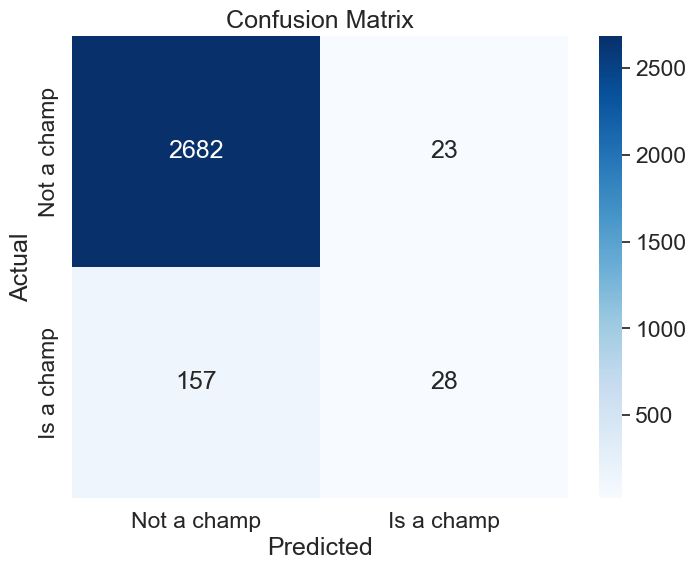

In [15]:
y_pred_new = clf.predict(X_test_new)
cm = metrics.confusion_matrix(y_test_new, y_pred_new)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

class_labels = ['Not a champ', 'Is a champ'] 
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

plt.show()

In [16]:
precision = metrics.precision_score(y_test_new, y_pred_new)
recall = metrics.recall_score(y_test_new, y_pred_new)
f1 = metrics.f1_score(y_test_new,y_pred_new)

print(f"accuracy is {acc}")
print(f"precision is {precision}")
print(f"recall is {recall}")
print(f"f1 is {f1}")


accuracy is 0.9377162629757786
precision is 0.5490196078431373
recall is 0.15135135135135136
f1 is 0.23728813559322035


In [17]:
'''Conclusions: It is not likely to predict the champion at the end of the regular season, although it is very likely to predict who will not be the champion'''

'Conclusions: It is not likely to predict the champion at the end of the regular season, although it is very likely to predict who will not be the champion'